Open this repository in binder:[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ChatzigeorgiouGroup/FractalDimension/master)


# Box-counting in three dimensional numpy arrays.

Description from [wikipedia](https://en.wikipedia.org/wiki/Fractal_dimension)
>In mathematics, more specifically in fractal geometry, a fractal dimension is a ratio providing a statistical index of complexity comparing how detail in a pattern (strictly speaking, a fractal pattern) changes with the scale at which it is measured. It has also been characterized as a measure of the space-filling capacity of a pattern that tells how a fractal scales differently from the space it is embedded in; a fractal dimension does not have to be an integer.

Here we offer a function that calculates the fractal dimension of an object embedded in three dimensional space using the boxcounting method, also known as the [Minkowski-Bouligand](https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension) dimension.

### Usage
Simple example, measuring a box in 3D space.

Fractal Dimension of the box: 3.036397272261638


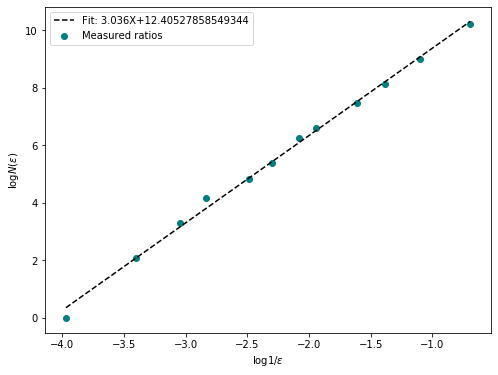

In [10]:
import numpy as np
from FractalDimension import fractal_dimension
import matplotlib.pyplot as plt

#test data
box = np.zeros(shape = (100,100,100))
box[20:80,20:80,20:80] = 1

fd = fractal_dimension(box, n_offsets=10, plot = True)
print(f"Fractal Dimension of the box: {fd}")
plt.show()

For a more complete overview of the function and its parameters, have a look at the notebook detailing the development of the function in binder.

## Our use case: Fractal Dimension as a measure for cytoskeleton complexity.

In our experiments on the development of the notochord in _Ciona intestinalis_ we observed that interfering with _Ca$^{2+}$_ signaling changed the morphology of the cytoskeleton in notochord cells. The changes are quite clear to the observer. To represent these changes in morphology quantitatively we decided to look at the fractal dimension of the 3d networks. Below we will give an example of this method applied to our real data.

_Note: The data, even heavily downscaled, exceeded githubs max file size limit. If you want to explore this data contact us for the original images._

In [11]:
import os
import tifffile
from skimage import filters
from skimage import exposure
import ipywidgets as widgets
from FractalDimension import fractal_dimension

In [12]:
paths = ["./example_data/"+path for path in os.listdir("./example_data/")]
drugs = ["control", "carbenoxolone", "gadolinium", "2apb"]

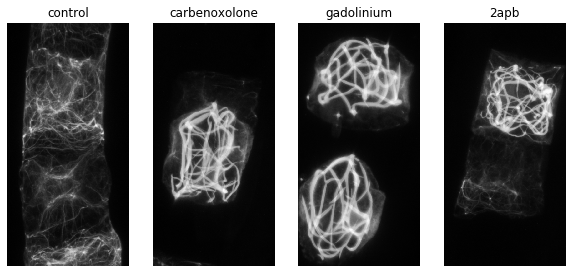

In [13]:
# A quick visualization of std-projections of the example data
fig, axes = plt.subplots(1,4, figsize = (10,8))
for ax, drug, path in zip(axes,drugs, paths):
    im = tifffile.imread(path)
    proj = np.std(im[:,:,:, 0], axis = 2)
    proj = filters.gaussian(proj, sigma = 0.5)
    ax.imshow(proj, cmap = "gray")
    ax.set_title(drug)
    ax.axis("off")

In [14]:
#function that shows a 3d numpy array as a 2D image with a slider to go through the z-dimension.
def slice_explorer(image):
    @widgets.interact
    def _slice_explorer(im = widgets.fixed(image), plane = (0, len(im)-1)):
        fig, ax = plt.subplots()
        
        ax.imshow(im[plane], cmap = "gray")
    return _slice_explorer

Fractal Dimention of ./example_data/control.tif: 2.5


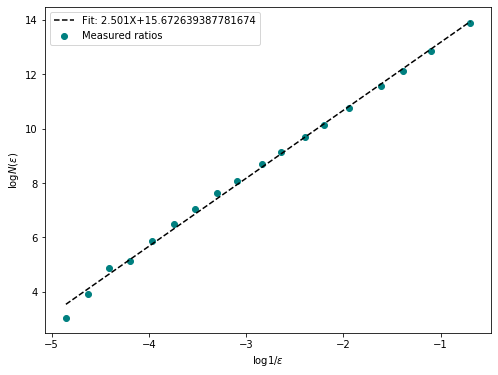

Fractal Dimention of ./example_data/carbenoxolone.tif: 2.46


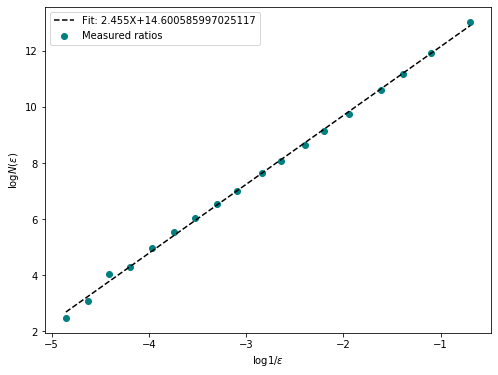

Fractal Dimention of ./example_data/gadolinium.tif: 2.46


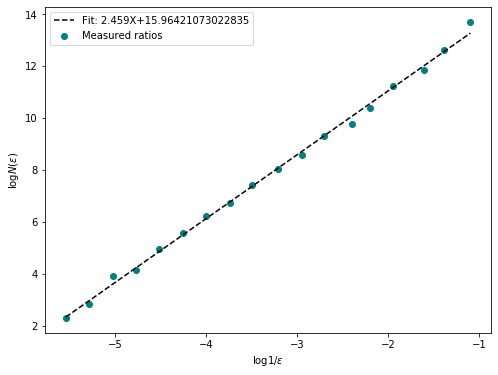

Fractal Dimention of ./example_data/2apb.tif: 2.38


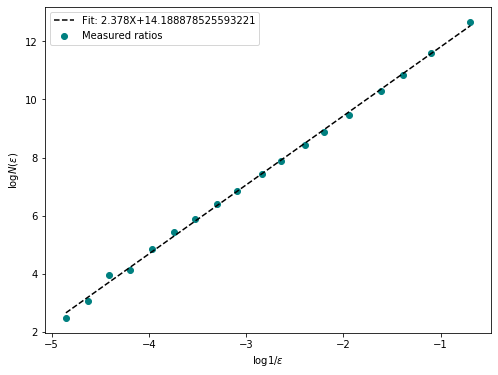

In [15]:
#For each image, do some preprocessing, calculate FD, visualize stack.
for path in paths:
    im = tifffile.imread(path)
    im = im[:,:,:,0].T
    im = exposure.adjust_gamma(im, gamma = 1.2)
    im = filters.gaussian(im, sigma = 0.8)
    im_t = im > filters.threshold_otsu(im)
## Uncomment this to get an interactive plot where you can inspect the planes of the 3d stack
#     slice_explorer(im_t)
    fd = fractal_dimension(im_t, n_samples = 20, n_offsets= 10, plot=True)
    print(f"Fractal Dimention of {path}: {np.round(fd, 2)}")
    plt.show()
    